In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["2mu2e"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

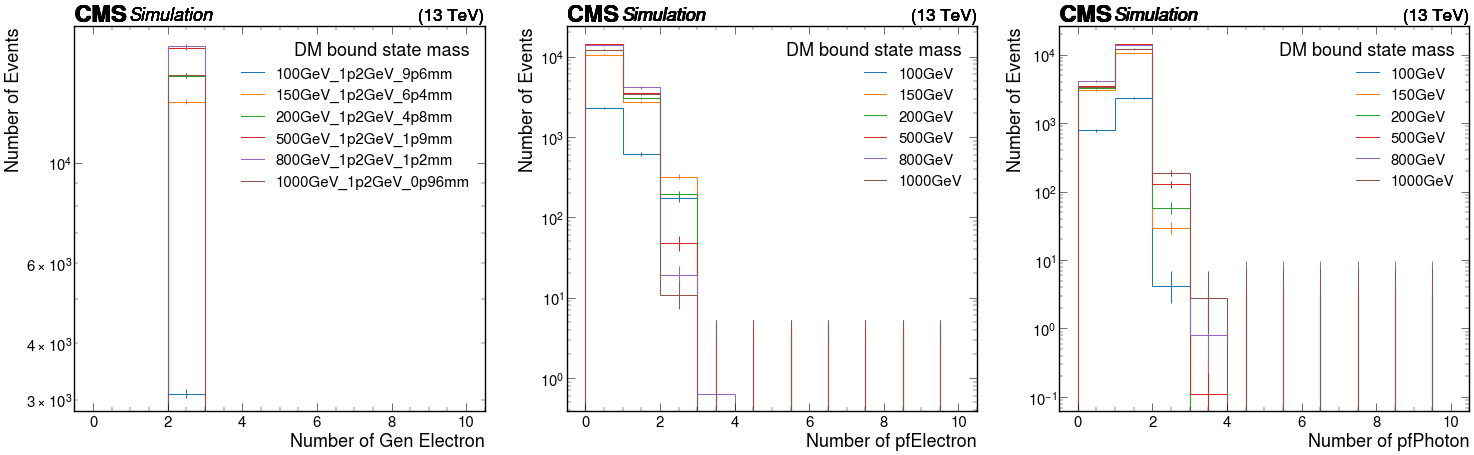

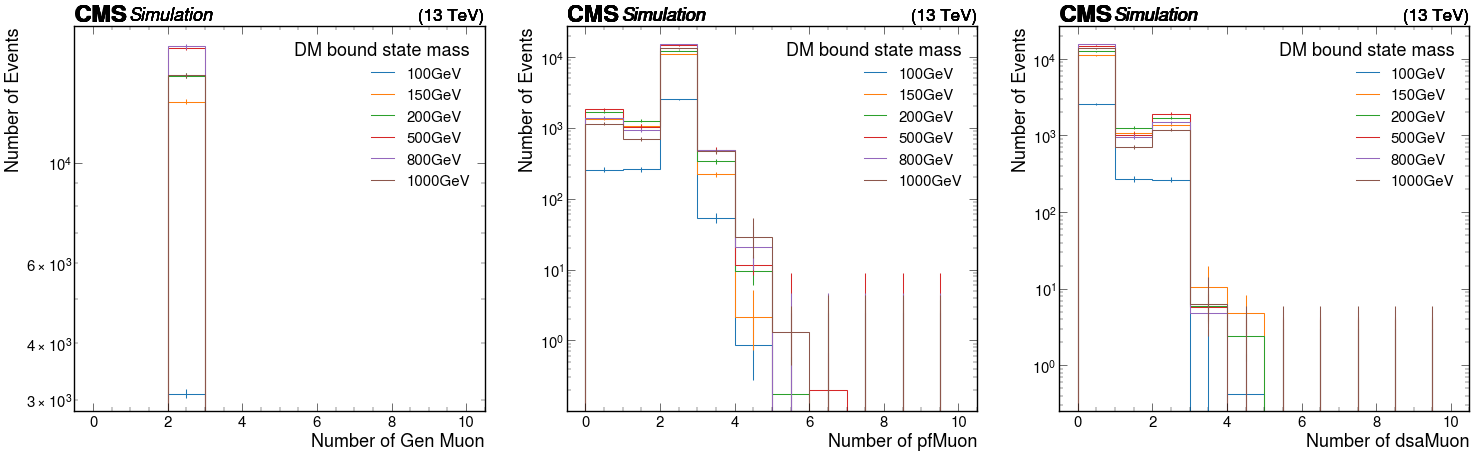

In [3]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_n"][channels[0], :10j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of Gen Electron")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_n"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of pfElectron")

plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_n"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of pfPhoton")
    

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_n"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of Gen Muon")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_n"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of pfMuon")

plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_n"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of dsaMuon")

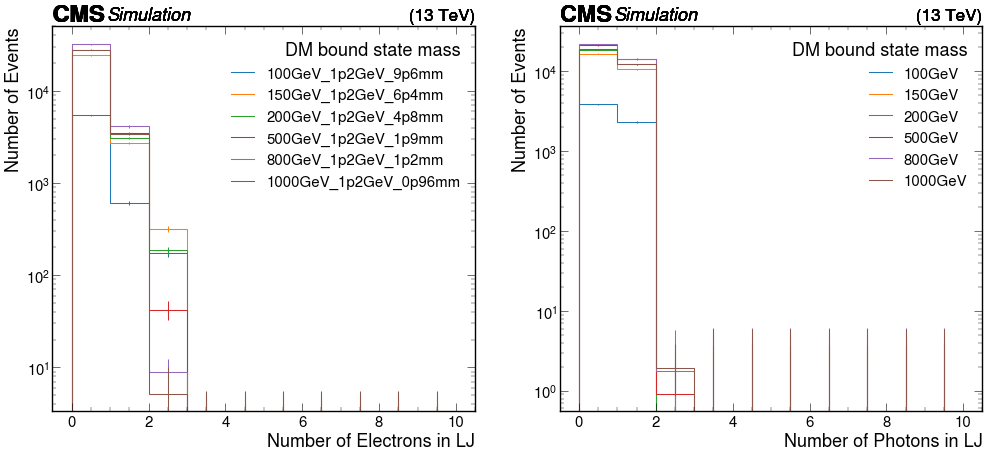

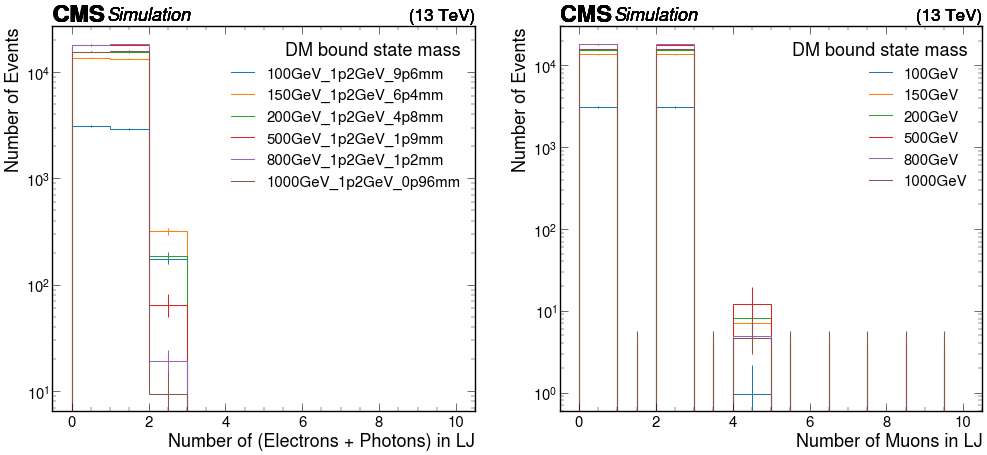

In [4]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_electronN"][channels[0], :10j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of Electrons in LJ")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_photonN"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of Photons in LJ")
    
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_electronPhotonN"][channels[0], :10j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of (Electrons + Photons) in LJ")

plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_muonN"][channels[0], :10j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.yscale("log")
    plt.ylabel("Number of Events")
    plt.xlabel("Number of Muons in LJ")

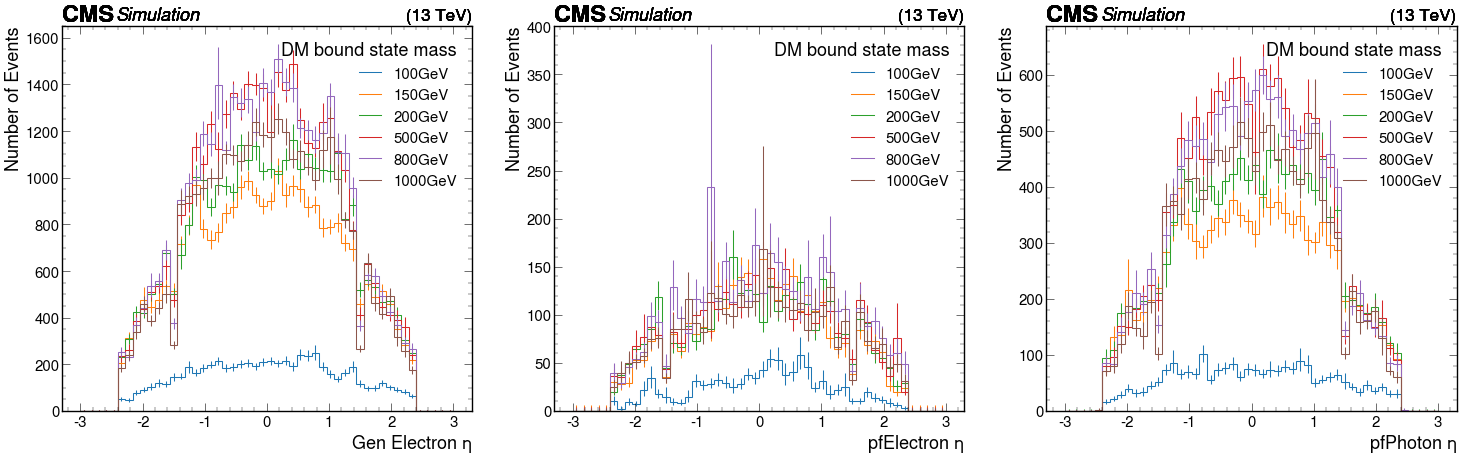

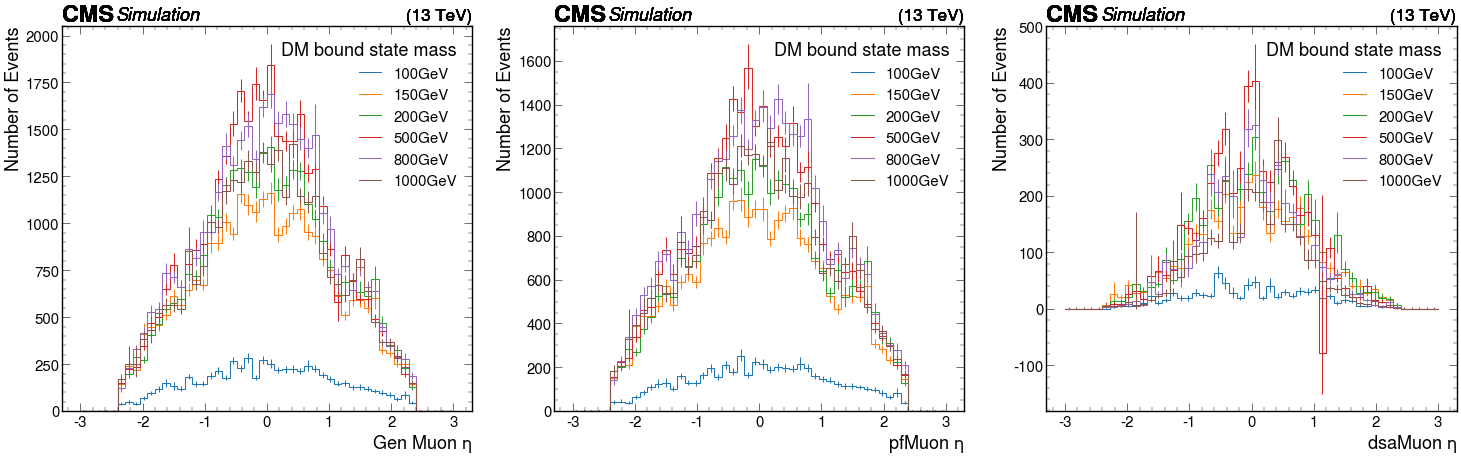

In [5]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_eta"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("Gen Electron $\eta$")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_eta"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    plt.xlabel("pfElectron $\eta$")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_eta"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("pfPhoton $\eta$")
    
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_eta"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("Gen Muon $\eta$")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_eta"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("pfMuon $\eta$")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_eta"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    plt.xlabel("dsaMuon $\eta$")

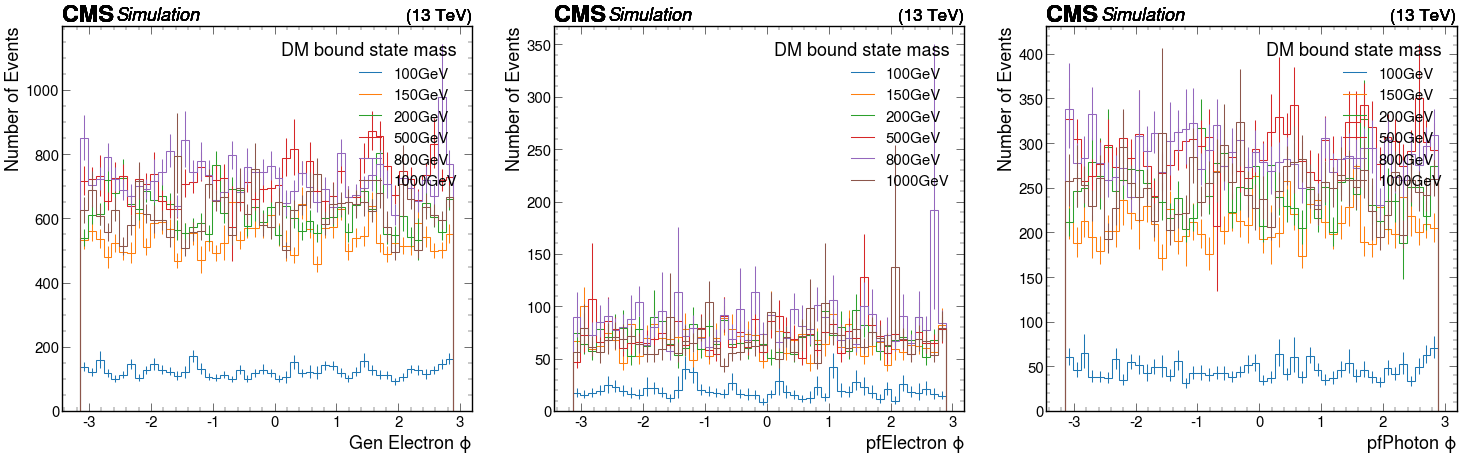

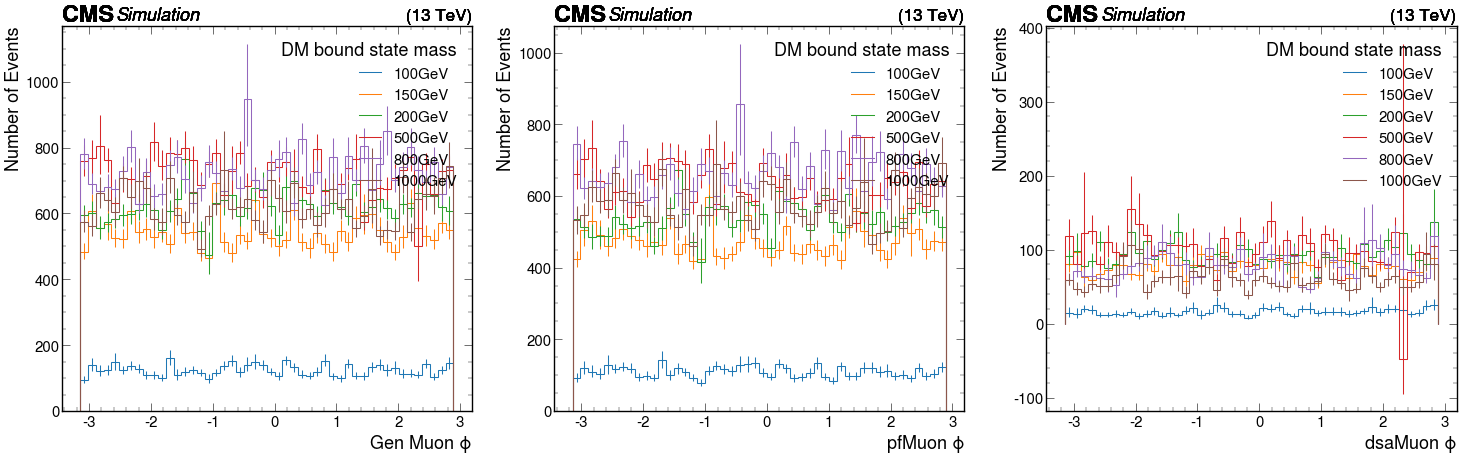

In [6]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_phi"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("Gen Electron $\phi$")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_phi"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    plt.xlabel("pfElectron $\phi$")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_phi"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("pfPhoton $\phi$")
    
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_phi"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("Gen Muon $\phi$")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_phi"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("pfMuon $\phi$")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_phi"][channels[0], -3:3j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    plt.xlabel("dsaMuon $\phi$")

Text(0, 1, 'dsaMuon $\\phi$')

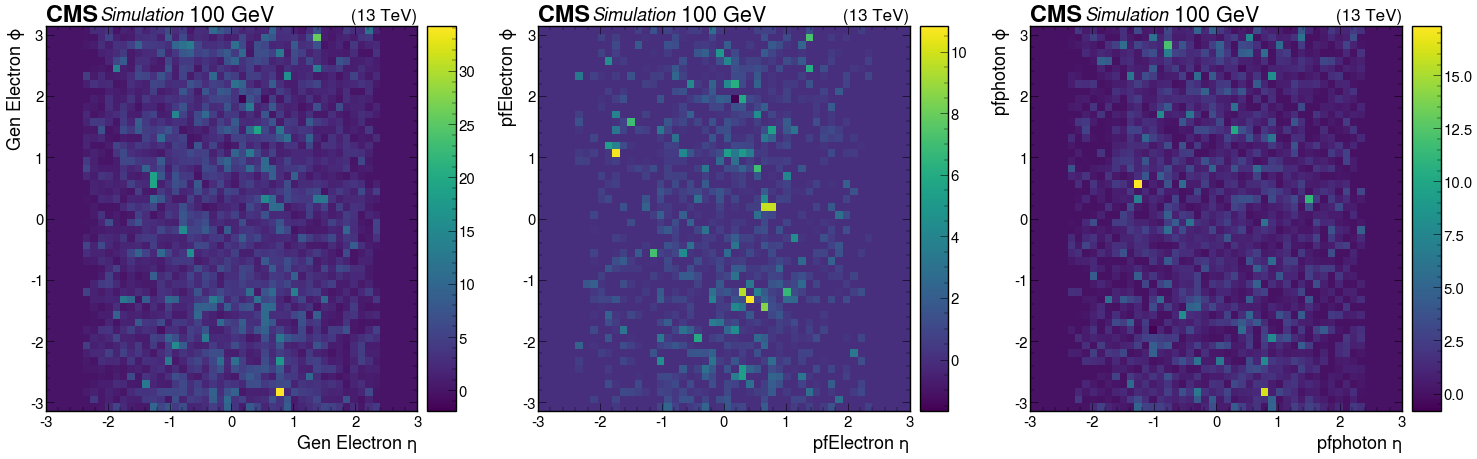

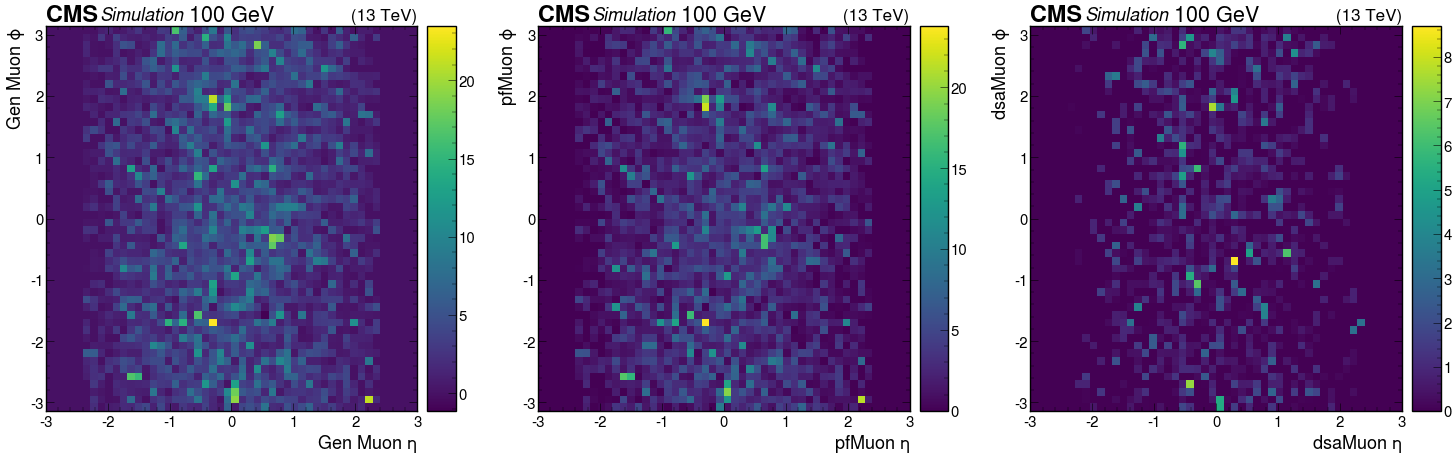

In [7]:
sample_100 = output["out"][samples[0]]["hists"]
sample_500 = output["out"][samples[3]]["hists"]
sample_1000 = output["out"][samples[5]]["hists"]

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_100["genE_eta_phi"][channels[0], :, :])
plt.title("100 GeV")
plt.xlabel("Gen Electron $\eta$")
plt.ylabel("Gen Electron $\phi$")

plt.subplot(1, nplots, 2)
utilities.plot(sample_100["electron_eta_phi"][channels[0], :, :])
plt.title("100 GeV")
plt.xlabel("pfElectron $\eta$")
plt.ylabel("pfElectron $\phi$")

plt.subplot(1, nplots, 3)
utilities.plot(sample_100["photon_eta_phi"][channels[0], :, :])
plt.title("100 GeV")
plt.xlabel("pfphoton $\eta$")
plt.ylabel("pfphoton $\phi$")

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_100["genMu_eta_phi"][channels[0], :, :])
plt.title("100 GeV")
plt.xlabel("Gen Muon $\eta$")
plt.ylabel("Gen Muon $\phi$")

plt.subplot(1, nplots, 2)
utilities.plot(sample_100["muon_eta_phi"][channels[0], :, :])
plt.title("100 GeV")
plt.xlabel("pfMuon $\eta$")
plt.ylabel("pfMuon $\phi$")

plt.subplot(1, nplots, 3)
utilities.plot(sample_100["dsaMuon_eta_phi"][channels[0], :, :])
plt.title("100 GeV")
plt.xlabel("dsaMuon $\eta$")
plt.ylabel("dsaMuon $\phi$")

Text(0, 1, 'dsaMuon $\\phi$')

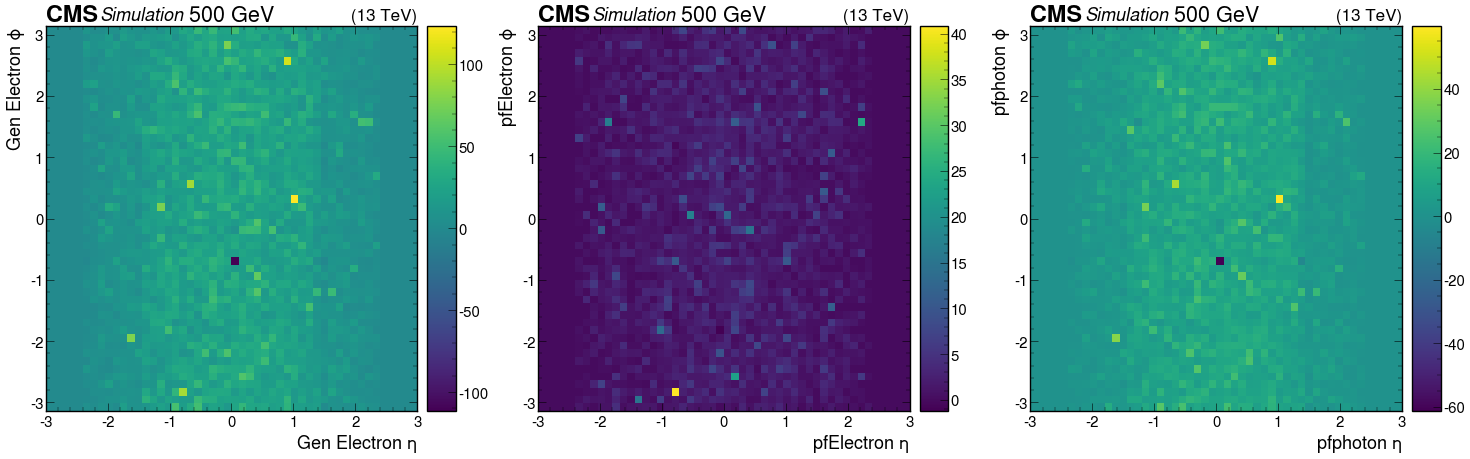

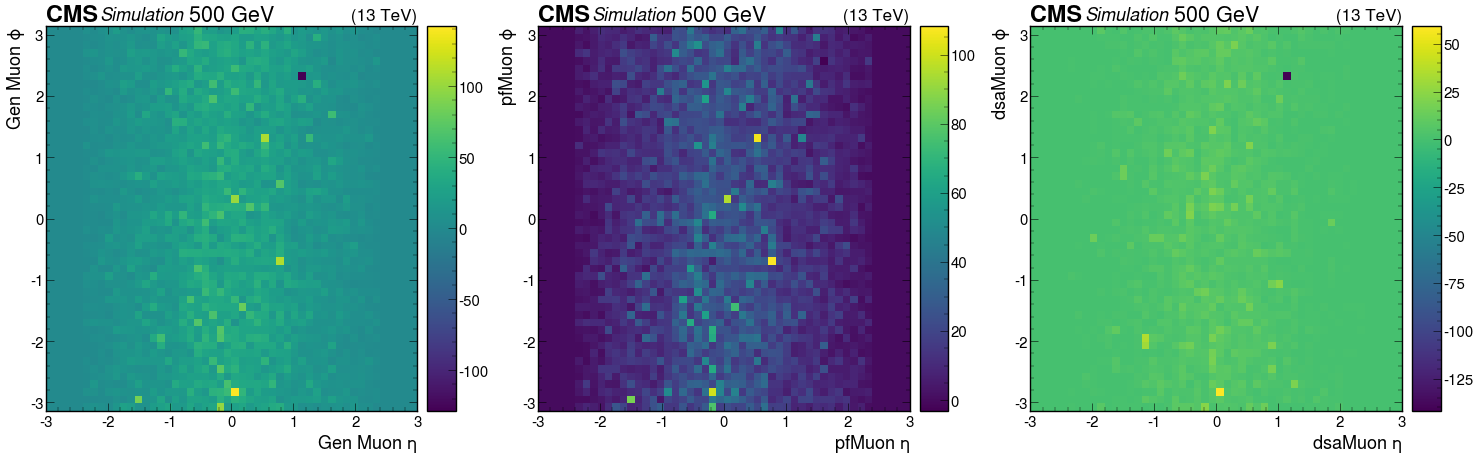

In [8]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_500["genE_eta_phi"][channels[0], :, :])
plt.title("500 GeV")
plt.xlabel("Gen Electron $\eta$")
plt.ylabel("Gen Electron $\phi$")

plt.subplot(1, nplots, 2)
utilities.plot(sample_500["electron_eta_phi"][channels[0], :, :])
plt.title("500 GeV")
plt.xlabel("pfElectron $\eta$")
plt.ylabel("pfElectron $\phi$")

plt.subplot(1, nplots, 3)
utilities.plot(sample_500["photon_eta_phi"][channels[0], :, :])
plt.title("500 GeV")
plt.xlabel("pfphoton $\eta$")
plt.ylabel("pfphoton $\phi$")

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_500["genMu_eta_phi"][channels[0], :, :])
plt.title("500 GeV")
plt.xlabel("Gen Muon $\eta$")
plt.ylabel("Gen Muon $\phi$")

plt.subplot(1, nplots, 2)
utilities.plot(sample_500["muon_eta_phi"][channels[0], :, :])
plt.title("500 GeV")
plt.xlabel("pfMuon $\eta$")
plt.ylabel("pfMuon $\phi$")

plt.subplot(1, nplots, 3)
utilities.plot(sample_500["dsaMuon_eta_phi"][channels[0], :, :])
plt.title("500 GeV")
plt.xlabel("dsaMuon $\eta$")
plt.ylabel("dsaMuon $\phi$")

Text(0, 1, 'dsaMuon $\\phi$')

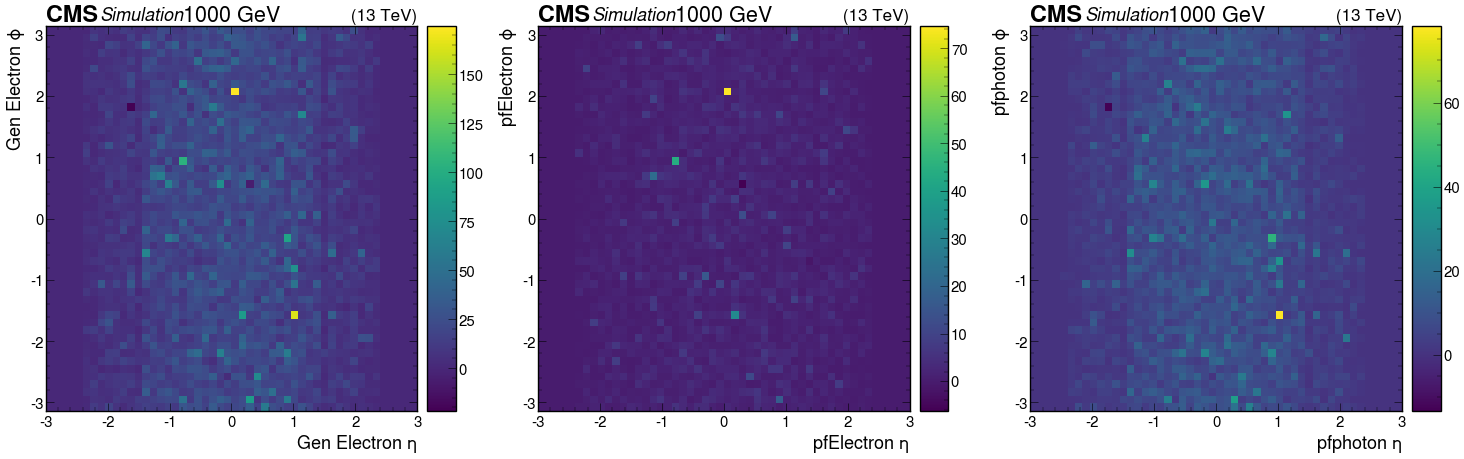

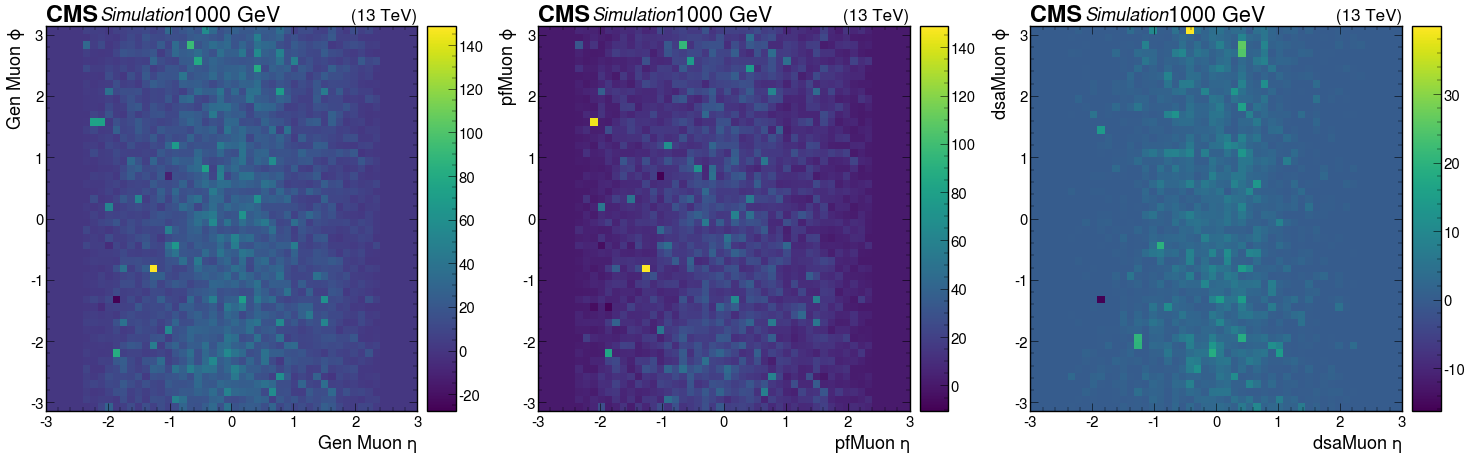

In [9]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_1000["genE_eta_phi"][channels[0], :, :])
plt.title("1000 GeV")
plt.xlabel("Gen Electron $\eta$")
plt.ylabel("Gen Electron $\phi$")

plt.subplot(1, nplots, 2)
utilities.plot(sample_1000["electron_eta_phi"][channels[0], :, :])
plt.title("1000 GeV")
plt.xlabel("pfElectron $\eta$")
plt.ylabel("pfElectron $\phi$")

plt.subplot(1, nplots, 3)
utilities.plot(sample_1000["photon_eta_phi"][channels[0], :, :])
plt.title("1000 GeV")
plt.xlabel("pfphoton $\eta$")
plt.ylabel("pfphoton $\phi$")

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_1000["genMu_eta_phi"][channels[0], :, :])
plt.title("1000 GeV")
plt.xlabel("Gen Muon $\eta$")
plt.ylabel("Gen Muon $\phi$")

plt.subplot(1, nplots, 2)
utilities.plot(sample_1000["muon_eta_phi"][channels[0], :, :])
plt.title("1000 GeV")
plt.xlabel("pfMuon $\eta$")
plt.ylabel("pfMuon $\phi$")

plt.subplot(1, nplots, 3)
utilities.plot(sample_1000["dsaMuon_eta_phi"][channels[0], :, :])
plt.title("1000 GeV")
plt.xlabel("dsaMuon $\eta$")
plt.ylabel("dsaMuon $\phi$")

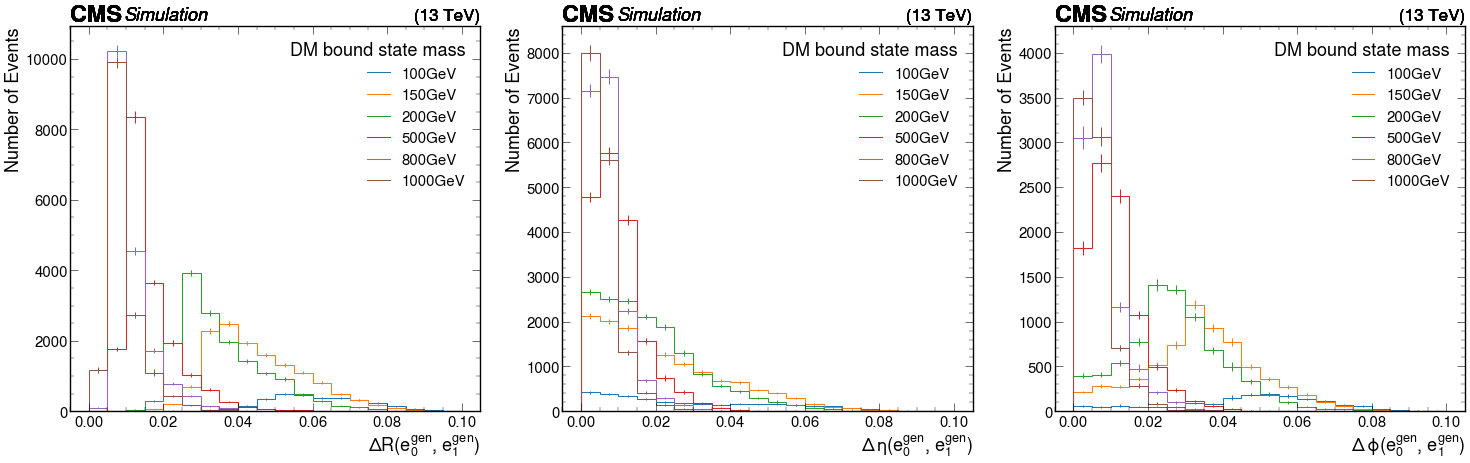

In [4]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_genE_dR"][channels[0], :0.1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_genE_dEta"][channels[0], :0.1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_genE_dphi"][channels[0], :0.1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")

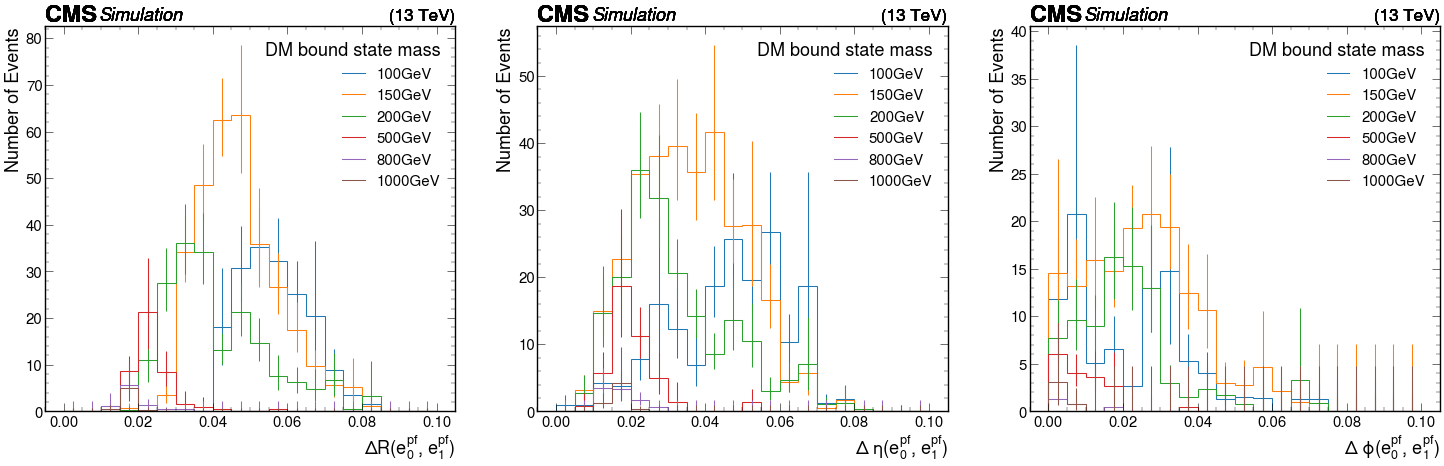

In [5]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_electron_dR"][channels[0], :0.1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_electron_dEta"][channels[0], :0.1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_electron_dphi"][channels[0], :0.1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")

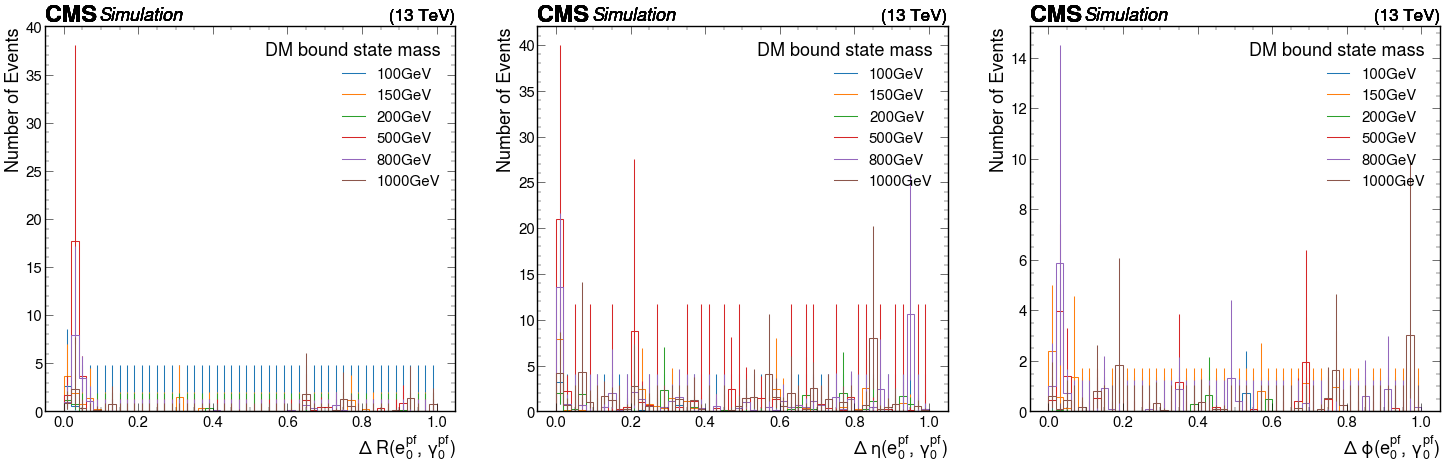

In [6]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_photon_dR"][channels[0], :1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_photon_dEta"][channels[0], :1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_photon_dphi"][channels[0], :1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


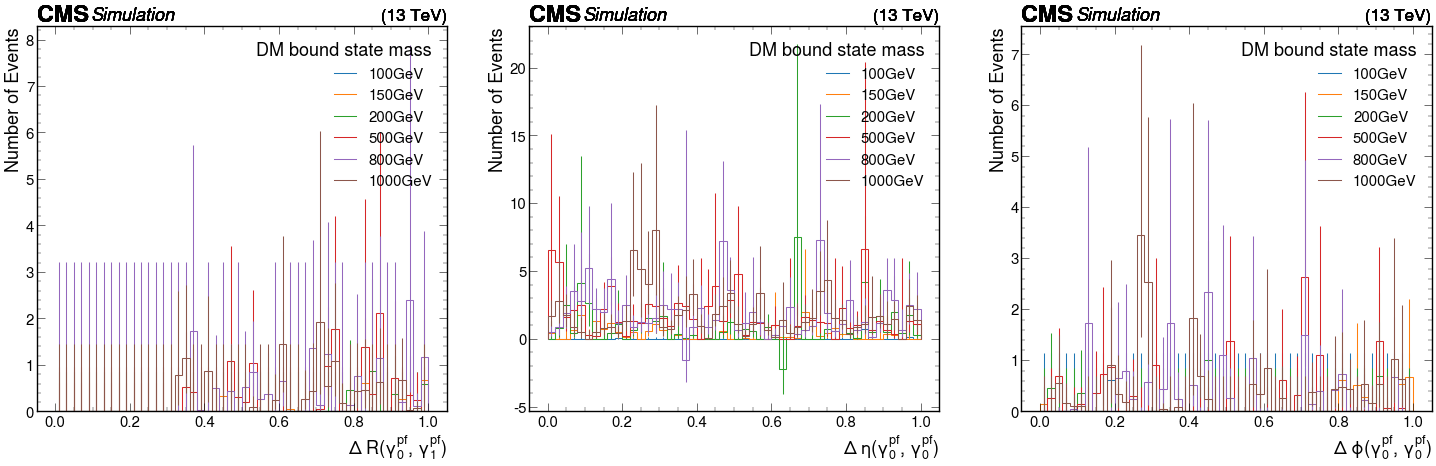

In [7]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_photon_dR"][channels[0], :1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_photon_dEta"][channels[0], :1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_photon_dphi"][channels[0], :1j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")

Text(0.5, 1.0, '1000 GeV')

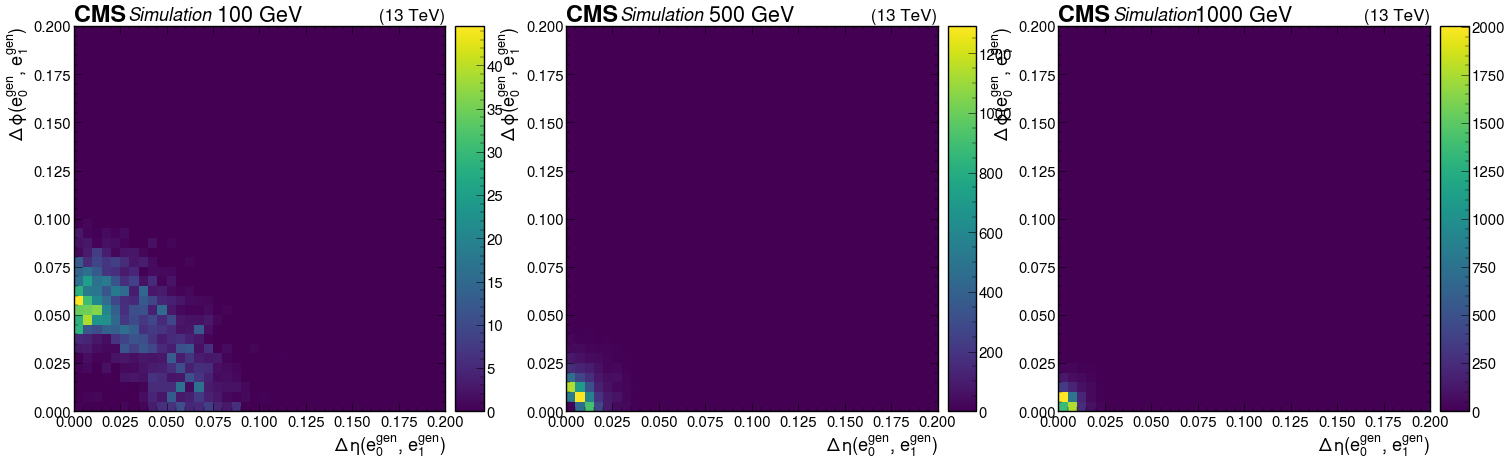

In [12]:
sample_100 = output["out"][samples[0]]["hists"]
sample_500 = output["out"][samples[3]]["hists"]
sample_1000 = output["out"][samples[5]]["hists"]

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_100["genE_genE_dEta_dphi"][channels[0], :0.2j, :0.2j])
plt.title("100 GeV")

plt.subplot(1, nplots, 2)
utilities.plot(sample_500["genE_genE_dEta_dphi"][channels[0], :0.2j, :0.2j])
plt.title("500 GeV")

plt.subplot(1, nplots, 3)
utilities.plot(sample_1000["genE_genE_dEta_dphi"][channels[0], :0.2j, :0.2j])
plt.title("1000 GeV")

Text(0.5, 1.0, '1000 GeV')

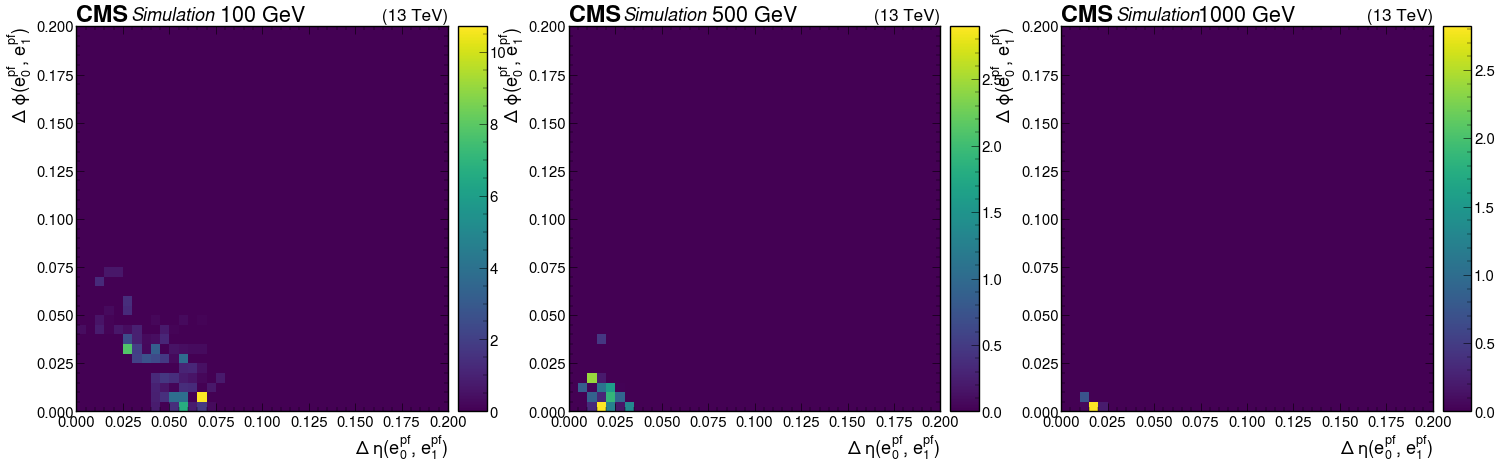

In [13]:
sample_100 = output["out"][samples[0]]["hists"]
sample_500 = output["out"][samples[3]]["hists"]
sample_1000 = output["out"][samples[5]]["hists"]

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_100["electron_electron_dEta_dphi"][channels[0], :0.2j, :0.2j])
plt.title("100 GeV")

plt.subplot(1, nplots, 2)
utilities.plot(sample_500["electron_electron_dEta_dphi"][channels[0], :0.2j, :0.2j])
plt.title("500 GeV")

plt.subplot(1, nplots, 3)
utilities.plot(sample_1000["electron_electron_dEta_dphi"][channels[0], :0.2j, :0.2j])
plt.title("1000 GeV")

Text(0.5, 1.0, '1000 GeV')

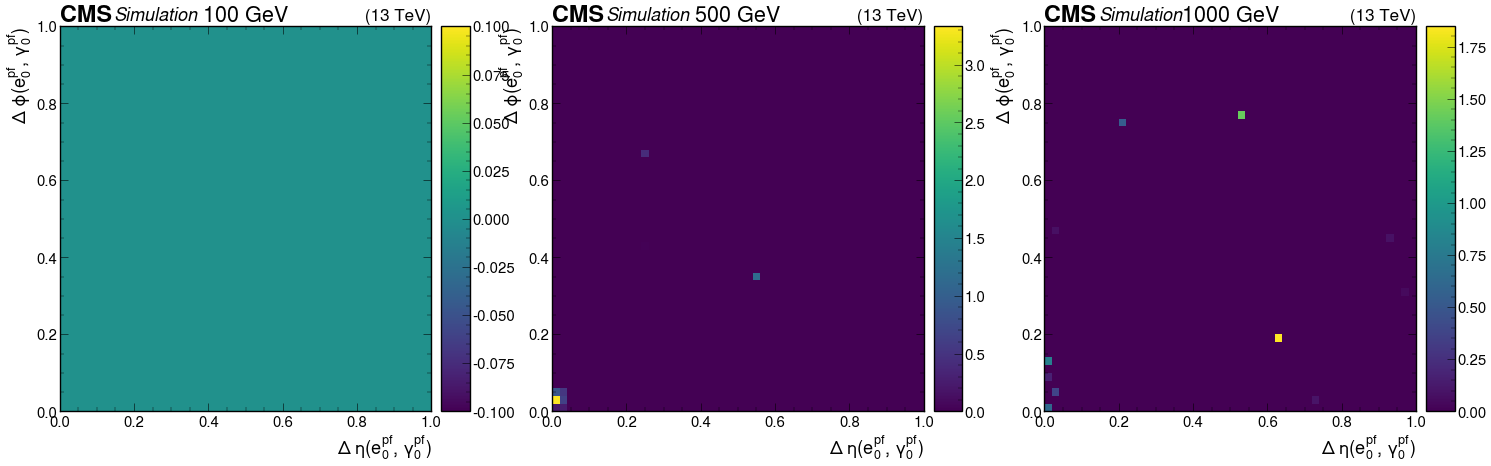

In [14]:
sample_100 = output["out"][samples[0]]["hists"]
sample_500 = output["out"][samples[3]]["hists"]
sample_1000 = output["out"][samples[5]]["hists"]

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_100["electron_photon_dEta_dphi"][channels[0], :, :])
plt.title("100 GeV")

plt.subplot(1, nplots, 2)
utilities.plot(sample_500["electron_photon_dEta_dphi"][channels[0], :, :])
plt.title("500 GeV")

plt.subplot(1, nplots, 3)
utilities.plot(sample_1000["electron_photon_dEta_dphi"][channels[0], :, :])
plt.title("1000 GeV")

Text(0.5, 1.0, '1000 GeV')

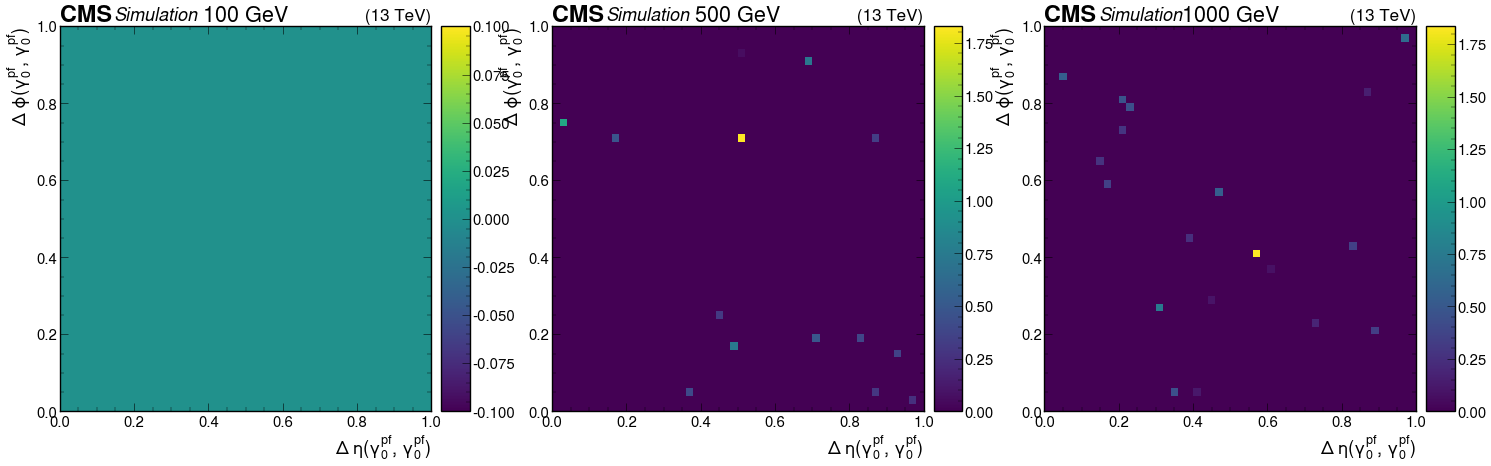

In [15]:
sample_100 = output["out"][samples[0]]["hists"]
sample_500 = output["out"][samples[3]]["hists"]
sample_1000 = output["out"][samples[5]]["hists"]

nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
utilities.plot(sample_100["photon_photon_dEta_dphi"][channels[0], :, :])
plt.title("100 GeV")

plt.subplot(1, nplots, 2)
utilities.plot(sample_500["photon_photon_dEta_dphi"][channels[0], :, :])
plt.title("500 GeV")

plt.subplot(1, nplots, 3)
utilities.plot(sample_1000["photon_photon_dEta_dphi"][channels[0], :, :])
plt.title("1000 GeV")

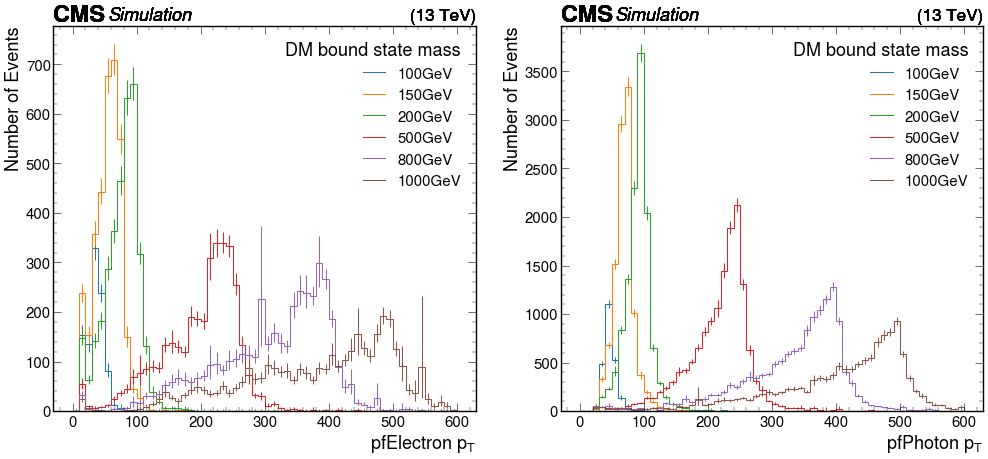

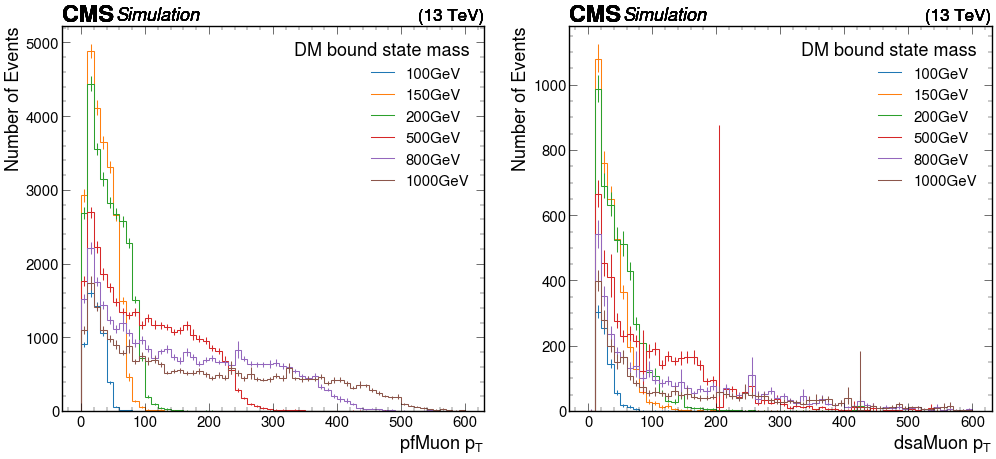

In [9]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_pt"][channels[0], 0:600j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("pfElectron $p_{T}$")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_pt"][channels[0], 0:600j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    plt.xlabel("pfPhoton $p_{T}$")
    
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_pt"][channels[0], 0:600j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right", loc='upper right')
    plt.ylabel("Number of Events")
    plt.xlabel("pfMuon $p_{T}$")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_pt"][channels[0], 0:600j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Number of Events")
    plt.xlabel("dsaMuon $p_{T}$")

In [ ]:
extra1_samples = [
    "2Mu2E_500GeV_0p25GeV_0p004mm",
    "2Mu2E_500GeV_0p25GeV_0p04mm",
    "2Mu2E_500GeV_0p25GeV_0p4mm",
    "2Mu2E_500GeV_0p25GeV_2mm",
    "2Mu2E_500GeV_0p25GeV_4mm",
    
    "2Mu2E_500GeV_1p2GeV_0p019mm",
    "2Mu2E_500GeV_1p2GeV_0p19mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_500GeV_1p2GeV_9p6mm",
    "2Mu2E_500GeV_1p2GeV_19mm",
    
    "2Mu2E_500GeV_5GeV_0p08mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_500GeV_5GeV_8mm",
    "2Mu2E_500GeV_5GeV_40mm",
    "2Mu2E_500GeV_5GeV_80mm",
]
extra1_fileset = utilities.make_fileset(extra1_samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["genA_base"],
)

extra1_output = runner.run(extra1_fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
extra1_out = extra1_output["out"]